In [72]:
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

In [2]:
s1 = ('John', 'Alex',10)
s2 = ('Thomas', 'Blue',18)

In [3]:
type(s1)

tuple

In [73]:
Student = namedtuple('Student', ['name','middlename','mark'])

In [5]:
s1= Student('John','Alex',10) #SIMILAR TO A CLASS

In [6]:
s1.name # SEE?

'John'

In [7]:
Approx = namedtuple('Approximation',['q','x','M']) # ELEMENTS OF INTERPOLATION METHOD

In [8]:
def lagrangian_basis(q,x):
    """This function takes two 1D numpy array , q and x, and returns a matrix M such that M[i,j] 
    is the evaluation of the polynomial ll_i on the point x_j"""
    n_nodes = q.shape[0]
    n_eval_points = x.shape[0]
    M = np.zeros((n_eval_points,n_nodes), dtype= np.float64)
    
    for i in range(n_eval_points):
        for j in range(n_nodes):
            M[i,j] = 1
            for k in range(n_nodes):
                if j==k:
                    continue
                M[i,j]= M[i,j]* (x[i]-q[k])/(q[j]-q[k])
    return M

In [9]:
def lagrangian_interpolator(n_nodes, x):
    """Build the operator that interpolates a function on [0,1] using n_nodes equally spaced"""
    q = np.linspace(0,1,n_nodes)
    M= lagrangian_basis(q,x)
    return Approx(q,x,M)

In [10]:
def lagrangian_interpolator_q(q, n_nodes, x):
    """Build the operator that interpolates a function on [0,1] using n_nodes with no order specified"""
    M= lagrangian_basis(q,x)
    return Approx(q,x,M)

In [76]:
def f1(x):
    """SIN FUNCTION NOTHING ELSE"""
    return np.sin(np.pi*x)

In [77]:
eval_points= np.linspace(0,1,257)

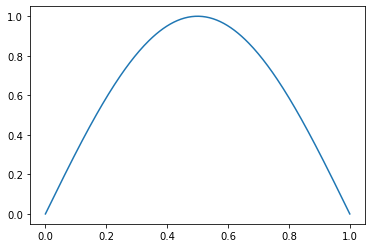

In [78]:
plt.plot(eval_points,f1(eval_points))

In [82]:
I_4 = lagrangian_interpolator(4,eval_points)

In [83]:
evaluation = I_4.M @ f1(I_4.q) # @ MATRIX MULTIPLICATION

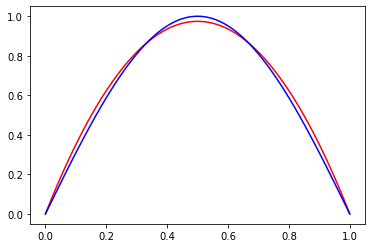

In [84]:
plt.plot(eval_points,evaluation,color = 'red')
plt.plot(eval_points,f1(eval_points),color = 'blue')

In [85]:
def convergency_plot(f_test,interpolator,x=np.linspace(0,1,257)):
    """This function plot the maximum error for every iteration increasing the number of nodes"""
    errors= []
    trials = list(range(2,30))
    for i in trials:
        operator = interpolator(i,x)
        f_q=f_test(operator.q)
        f_x=f_test(x)
        I_f_x=operator.M @ f_q
        error = np.max(np.abs(f_x - I_f_x))
        errors.append(error)
    plt.semilogy(trials,errors,label=interpolator.__name__)
    plt.legend()

In [18]:
def f2(x):
    """TRASLATED ABS FUNCTION"""
    return abs(x-0.5)

In [19]:
def f3(x):
    """RUNGE FUNCTION"""
    return 1/(1+100*(x-.5)**2)

In [86]:
def chebyshev_nodes(n_nodes):
    """This function returns a np array containing n points with a chebyshev distribution"""
    return np.cos((2*np.arange(1,n_nodes+1)-1)/float(2*n_nodes)*np.pi)

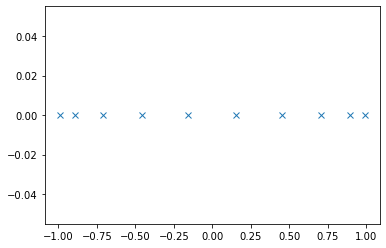

In [87]:
c_nodes= chebyshev_nodes(10)
plt.plot(c_nodes, np.zeros_like(c_nodes),linestyle='', marker='x')

In [88]:
def chebyshev_interpolator(n_nodes, x):
    """Build the operator that interpolates a function on [0,1] using n chevysheb distributed nodes """
    q= chebyshev_nodes(n_nodes)
    M= lagrangian_basis(q,x)
    return Approx(q,x,M)

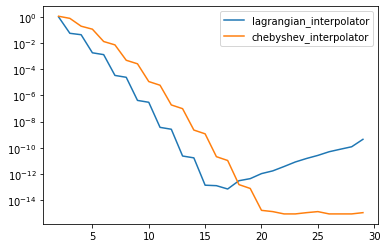

In [89]:
#LETS SEE FOR SIN FUNCTION
convergency_plot(f1,lagrangian_interpolator)
convergency_plot(f1,chebyshev_interpolator)

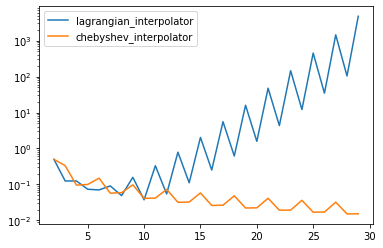

In [24]:
#LETS SEE FOR ABS FUNCTION (WIGGLY EH)
convergency_plot(f2,lagrangian_interpolator)
convergency_plot(f2,chebyshev_interpolator)

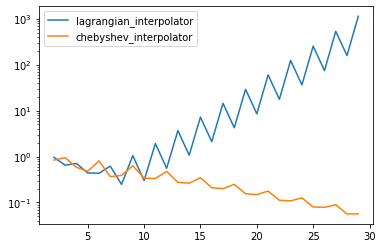

In [25]:
#LETS SEE FOR RUNGE FUNCTION (WIGGLY EH)
convergency_plot(f3,lagrangian_interpolator)
convergency_plot(f3,chebyshev_interpolator)

In [94]:
def test_interpolation(f_test,interpolator,n_nodes,x=np.linspace(0,1,257)):
    """generalization of interpolator function for different approaches, returns the array 
    with the interpolation points and the evaluated points"""
    operator = interpolator(n_nodes,x)
    f_q=f_test(operator.q)
    f_x=f_test(x)
    I_f_x=operator.M @ f_q
    return I_f_x,f_x

In [95]:
def plot_interpolation(f_test,interpolator,n_nodes,x=np.linspace(0,1,257)):
    """Plots the interpolation and the function for different approaches"""
    I_f_x,f_x = test_interpolation(f_test,interpolator,n_nodes,x)
    plt.plot(x,f_x,linestyle='--')
    plt.plot(x,I_f_x)
    #plt.plot(operator.q,f_q,linestyle='', marker='o', color='red')

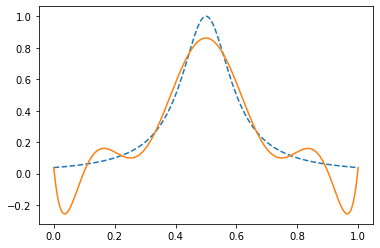

In [96]:
plot_interpolation(f3,lagrangian_interpolator,10)

In [ ]:
# never write a default argument, unless u are in a hurry

In [97]:
from scipy.special import comb
def bernstein_basis(q,x=np.linspace(0,1,257)):
    """This function takes two 1D numpy array , q and x, and returns a matrix M such that M[i,j] 
    is the evaluation of the polynomial bb_i on the point x_j"""
    n_nodes=q.shape[0]
    eval_points= x.shape[0]
    M= np.zeros((eval_points,n_nodes), dtype= np.float64)
    q= np.linspace(0,1,n_nodes)
    n = n_nodes-1
    for i in range(n_nodes):
        M[:,i] = comb(n,i)*(x**i)*(1-x)**(n-i)
    return M

In [98]:
def bernstein_interpolator(n_nodes,x=np.linspace(0,1,257)):
    """Build the bernstein operator that interpolates a function on [0,1] using n_nodes equally spaced"""
    q= np.linspace(0,1,n_nodes)
    M= bernstein_basis(q,x)
    return Approx(q,x,M)

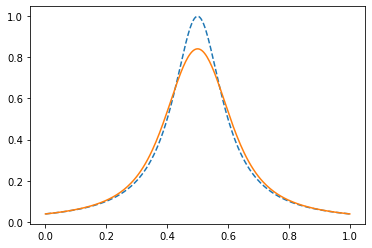

In [100]:
plot_interpolation(f3,bernstein_interpolator,100) #SLOWLY BUT SURELY

In [32]:
# jumps up and down in the convergency plot exist because of the symmetry so you are wasting one degree fo freedom every non pair number of nodes

In [33]:
def f4(x):
    """EXPONENTIAL FUNCTION"""
    return np.exp(x)

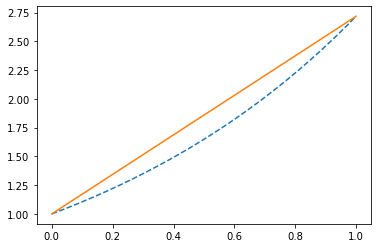

In [93]:
plot_interpolation(f4,lagrangian_interpolator,2)

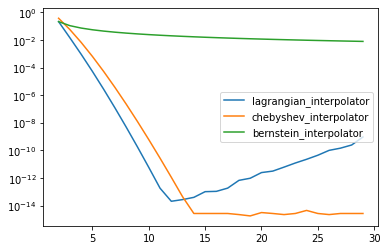

In [35]:
#NOW SMOOTH EH (KINDA)
convergency_plot(f4,lagrangian_interpolator)
convergency_plot(f4,chebyshev_interpolator)
convergency_plot(f4,bernstein_interpolator)

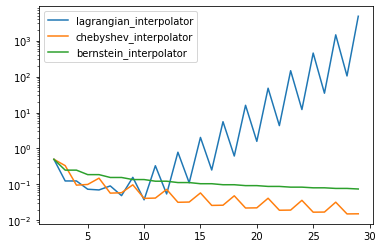

In [103]:
convergency_plot(f2,lagrangian_interpolator)
convergency_plot(f2,chebyshev_interpolator)
convergency_plot(f2,bernstein_interpolator)


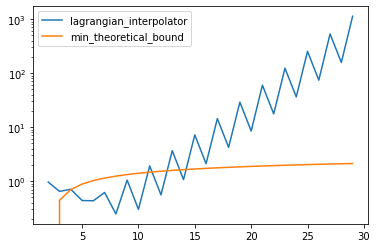

In [105]:
#THEORETICAL MINIMUM BOUND
n_nodes= 30
convergency_plot(f3,lagrangian_interpolator)
min_theoretical= np.array([(2/np.pi)*np.log(n-1) for n in range(2,n_nodes)])
plt.semilogy(range(2,n_nodes),min_theoretical,label='min_theoretical_bound')
plt.legend()

In [106]:
#NAIVE VERSION OF FINDING OPTIMAL POINTS FOR LAGRANGIAN BASIS
def lagrangian_q(f_test,q,x=np.linspace(0,1,257)):
    """lagrangian interpolator for any kind of function and q array, returns the array 
    with the interpolation points and the evaluated points"""
    n_nodes = q.shape[0]
    operator = lagrangian_interpolator_q(q,n_nodes,x)
    f_q=f_test(operator.q)
    f_x=f_test(x)
    I_f_x=operator.M @ f_q
    return I_f_x,f_x

In [107]:
def error_q(f_test,q,x=np.linspace(0,1,257)):
    """obtains the error of the lagrangian interpolator for any kind of function and q arrays"""
    n_nodes = q.shape[0]
    I_f_x,f_x= lagrangian_q(f_test,q,x)
    E = max(abs(f_x-I_f_x))
    return E

In [108]:
from itertools import combinations
def optimal_points_lagrange(f_test,n_nodes=5,x=np.linspace(0,1,25)):
    """Obtains all possible combinations of points and then evaalutes its error in the lagrangian
    interpolator and selects the one with minimal error"""
    combination_array = np.array(list(combinations(x, n_nodes)))
    min_value = error_q(f_test,combination_array[0],x)
    
    for i in range(1,len(combination_array)):
        E = error_q(f_test,combination_array[i],x)
        if (min_value>E):
            min_value=E
            min_points= combination_array[i]
    return min_points

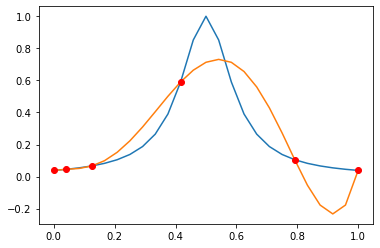

In [120]:
q = optimal_points_lagrange(f3,7)
I_f_x,f_x= lagrangian_q(f3,q,np.linspace(0,1,25))
plt.plot(np.linspace(0,1,25),f_x)
plt.plot(np.linspace(0,1,25),I_f_x)
plt.plot(q,f3(q),'ro')

In [114]:
#USING MINIMIZE AND NELDER-MEAD METHOD
from scipy.optimize import minimize
def objective(q):
    """Function to minimize"""
    return error_q(f3,q)

In [115]:
def optimal_points(n_points):
    """Obtains the optimal set of points for lagrangian interpolation using Nelder Mead Method,
    this method does not accept bounds"""
    q0=np.linspace(0.0,1.0,n_points) #Initial guess
    #b = (0.0,1.0) 
    #bds = ((b),)*n_points
    sol= minimize(objective,q0,method='Nelder-Mead')
    return sol.x

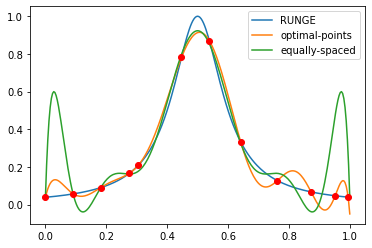

In [119]:
q_optimal= optimal_points(12)   # len(q) = 10
q0 = np.linspace(0.0,1.0,12) 
x= np.linspace(0,1,257)

I_f_x,f_x= lagrangian_q(f3,q_optimal)
I_f_x_2,f_x_2= lagrangian_q(f3,q0)
plt.plot(x,f_x,label='RUNGE')
plt.plot(x,I_f_x,label='optimal-points')
plt.plot(x,I_f_x_2,label='equally-spaced')
plt.plot(q_optimal,f3(q_optimal),'ro')
plt.legend()